# Sentiment Analysis: Spotify Review App

Regarding the data, the dataset was taken from Kaggle. This is a dataset for __multiclass sentiment classification__.

Basically a basic sentiment analysis problem, as in this case, consists of a classification problem, where the possible output labels are: `positive`, `neutral` and `negative`. Which indicates, if the review of a Spotify App speaks positively, negatively or neither of both. In our case it is a multiclass problem of 3 classes, but one could have many more "feelings" tagged and thus allow a more granular analysis.

### These are the objectives of the project:

* Vectorize the data in order to apply a machine learning model to it: using BoW, TF-IDF and my own WordEmbedding.
* Train a sentiment analysis model that allows us to detect positive, negative and neutral opinions in movie reviews with the best possible combination between the Dataset, Model and Vectorization technique chosen.

---
## 1. Get the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display
from scipy import sparse
%matplotlib inline

In [14]:
data = pd.read_csv("/Users/carolinapeinado/Desktop/Santi/SpotifyAppReviews/files/reviews.csv")

In [4]:
data

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN
...,...,...,...,...,...
61589,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN
61590,2022-01-01 02:13:40,"Use to be sooo good back when I had it, and wh...",1,0,NaN
61591,2022-01-01 01:02:29,This app would be good if not for it taking ov...,2,10,NaN
61592,2022-01-01 00:49:23,The app is good hard to navigate and won't jus...,2,1,NaN


---
## 2. Data Analysis and Pre-Procesing

In [5]:
print("BASIC INFO")
print('-'*20,"\n")
print("The shape of the dataset is:",data.shape,"\n")
columns = list(data.columns)

data_0 = data.copy()
print("Percentage of missing values")
data_0 = data_0.dropna().reset_index(drop=True)
empties = data_0.isna().sum()
empties_sort = empties.sort_values(ascending= False) 
empties_sort_per = (empties_sort/len(data_0))
print(empties_sort_per,"\n")

print("The columns of the dataset are:",columns,"\n")
for i in range(len(columns)):
  print(f"The type of {columns[i]} column is:", data[str(columns[i])].dtypes)

BASIC INFO
-------------------- 

The shape of the dataset is: (61594, 5) 

Percentage of missing values
Time_submitted    0.0
Review            0.0
Rating            0.0
Total_thumbsup    0.0
Reply             0.0
dtype: float64 

The columns of the dataset are: ['Time_submitted', 'Review', 'Rating', 'Total_thumbsup', 'Reply'] 

The type of Time_submitted column is: object
The type of Review column is: object
The type of Rating column is: int64
The type of Total_thumbsup column is: int64
The type of Reply column is: object


In [15]:
#Let´s analyze the amount of duplicates on the "Review" column..
data.drop_duplicates(subset=["Review"], keep="first", inplace=True)
data["Review"].describe()

count                                                 61356
unique                                                61356
top       Great music service, the audio is high quality...
freq                                                      1
Name: Review, dtype: object

We have 61356 Reviews, each one of them different. It seems, that the Time when the Review was made and wheter if was a Reply from Spotify or not and the amount of thumsbup it won´t give me much of useful information for further Analysis, hence I am going to eliminate all those columns to continue with the EDA.

In [16]:
del data["Reply"]
del data["Time_submitted"]
del data["Total_thumbsup"]
data

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1
...,...,...
61589,Even though it was communicated that lyrics fe...,1
61590,"Use to be sooo good back when I had it, and wh...",1
61591,This app would be good if not for it taking ov...,2
61592,The app is good hard to navigate and won't jus...,2


Basic Info of the Rating feedback...
5    21941
1    17610
4     7821
2     7108
3     6876
Name: Rating, dtype: int64 



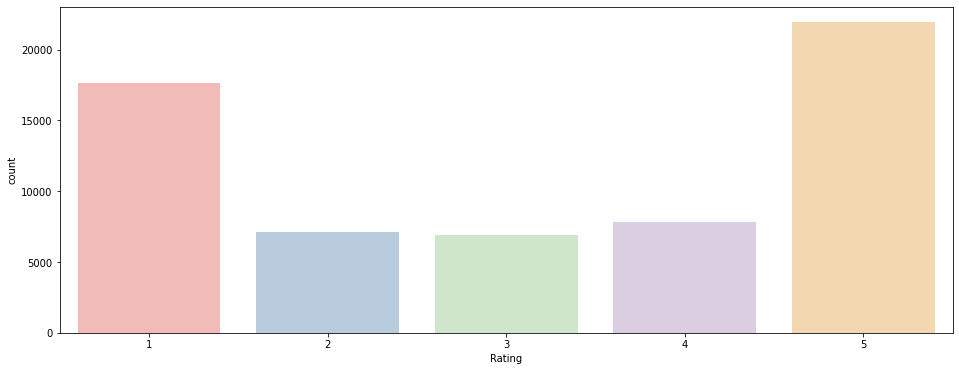

The percentage of the value 1 is of 28.7 % 

The percentage of the value 2 is of 11.58 % 

The percentage of the value 3 is of 11.21 % 

The percentage of the value 4 is of 12.75 % 

The percentage of the value 5 is of 35.76 % 



In [8]:
print("Basic Info of the Rating feedback...")
a = data["Rating"].value_counts()
print(a,"\n")
plt.figure(figsize=(16,6))
sns.countplot(data=data, x="Rating", palette='Pastel1')
plt.show()

total = data.shape[0]
for i in range(6):
  if i != 0:
    percentage = a[i]/total
    print(f"The percentage of the value {i} is of",round(percentage,4)*100,"%","\n")


I´am going to "tranform" this problem into a simpler problem, which was the objective of it once started... In order to do this, the "Rating" column should be tranform. 
The reviews with 4 or 5 stars will be considered as positive = 1, the ones with 1 or 2 as negative = 0 and the ones with 3 as neutral = 2. 

In [17]:
for index, column in data.iterrows():
  if data.loc[index, "Rating"] == 1 or data.loc[index, "Rating"] == 2:
    data.loc[index, "Rating"] = "Negative"
  elif data.loc[index, "Rating"] == 3:
    data.loc[index, "Rating"] = "Neutral"
  else:
    data.loc[index, "Rating"] = "Positive"

data

,Review,Rating
0,"Great music service, the audio is high quality...",Positive
1,Please ignore previous negative rating. This a...,Positive
2,"This pop-up ""Get the best Spotify experience o...",Positive
3,Really buggy and terrible to use as of recently,Negative
4,Dear Spotify why do I get songs that I didn't ...,Negative
...,...,...
61589,Even though it was communicated that lyrics fe...,Negative
61590,"Use to be sooo good back when I had it, and wh...",Negative
61591,This app would be good if not for it taking ov...,Negative
61592,The app is good hard to navigate and won't jus...,Negative


Basic Info of the Rating feedback...
Positive    29762
Negative    24718
Neutral      6876
Name: Rating, dtype: int64 



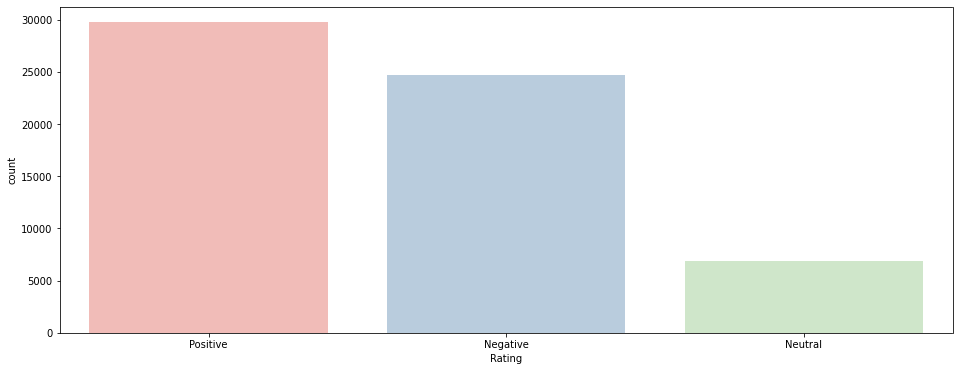

The percentage of the value Positive is of 48.51 % 

The percentage of the value Neutral is of 40.29 % 

The percentage of the value Negative is of 11.21 % 



In [10]:
print("Basic Info of the Rating feedback...")
a = data["Rating"].value_counts()
print(a,"\n")
plt.figure(figsize=(16,6))
sns.countplot(data=data, x="Rating", palette='Pastel1')
plt.show()

total = data.shape[0]
classes = ["Positive", "Neutral", "Negative"]
for i in range(3):
    percentage = a[i]/total
    print(f"The percentage of the value {classes[i]} is of",round(percentage,4)*100,"%","\n")

As we can see the "Neutral" class has much less samples, we are clearly dealing with an Imbalanced dataset

# Handling with Imbalanced data on NLP

## Oversampling with Data Augmentation

- Google Translation (google trans python package): This is one of the useful techniques to expand the count of minority groups. Here, we translate the given sentence to ‘non-English’ language and then again translating to ‘English’. In this way, the significant details of the input message are maintained but the order of words / sometimes new words with similar meaning are introduced as a new record and thus boosting the count of insufficient class.

For example:
Input text  – “warning for using windows disk space”
Data Augmented text – “Warning about using Windows storage space”

In [18]:
neu_data = data.loc[data["Rating"] == "Neutral"]
print(neu_data.shape)

(6876, 2)


In [2]:
from deep_translator import GoogleTranslator
import warnings
warnings.filterwarnings("ignore")

Translating to Russiam

In [24]:
neu_data_c = neu_data.copy()
neu_data_c['name'] = neu_data_c["Review"].apply(lambda x: GoogleTranslator(source='auto', target='russian').translate(str(x)))

In [3]:
#Translated df
russian_trans = pd.read_csv("russian_trans.csv", index_col=0)

#Data cleaning
del russian_trans["Review"], russian_trans["Rating"]
russian_trans.rename(columns={"name":"Reviews"}, inplace=True)
russian_trans = russian_trans.reset_index(drop=True)
russian_trans.head()

,Reviews
0,Элементы управления плеером иногда исчезают бе...
1,Все еще очень медленно при смене хранилища на ...
2,"Я не могу слушать свой СКАЧАННЫЙ плейлист, ког..."
3,"Я вышел из своего аккаунта, но когда я попытал..."
4,Нет возможности удалить песню из альбома. Нет ...


In [4]:
import time

Translating back into english

In [9]:
russian_trans_c = russian_trans.copy()
for index, col in russian_trans_c.iterrows():
    timer = time.time()
    if time.time() < (timer + 1):
        try:
            russian_trans_c.loc[index, "Reviews"] = GoogleTranslator(source="auto", target="english").translate(russian_trans_c.loc[index, "Reviews"])
        except:
            pass

russian_trans_c.to_csv("eng_trans.csv")

In [35]:
russian_trans_c

,Reviews
0,Player controls sometimes disappear for no rea...
1,Still very slow when changing storage to exter...
2,I can't listen to my DOWNLOADED playlist when ...
3,I'm logged out of my account but when I tried ...
4,There is no way to remove a song from an album...
...,...
6871,Spotify is great because you can listen to it ...
6872,"If you're a paid user, it's ok, but the artist..."
6873,I am using Spotify Premium. The biggest disapp...
6874,The application is good. But there are also un...


In [38]:
russian_trans_c = russian_trans_c.assign(Rating="Neutral")
russian_trans_c 

,Reviews,Rating
0,Player controls sometimes disappear for no rea...,Neutral
1,Still very slow when changing storage to exter...,Neutral
2,I can't listen to my DOWNLOADED playlist when ...,Neutral
3,I'm logged out of my account but when I tried ...,Neutral
4,There is no way to remove a song from an album...,Neutral
...,...,...
6871,Spotify is great because you can listen to it ...,Neutral
6872,"If you're a paid user, it's ok, but the artist...",Neutral
6873,I am using Spotify Premium. The biggest disapp...,Neutral
6874,The application is good. But there are also un...,Neutral


In [43]:
#Joining both dataframes
russian_trans_c.rename(columns={"Reviews":"Review"}, inplace=True)
data_augmented = data.append(russian_trans_c, ignore_index=True)
data_augmented

,Review,Rating
0,"Great music service, the audio is high quality...",Positive
1,Please ignore previous negative rating. This a...,Positive
2,"This pop-up ""Get the best Spotify experience o...",Positive
3,Really buggy and terrible to use as of recently,Negative
4,Dear Spotify why do I get songs that I didn't ...,Negative
...,...,...
68219,Spotify is great because you can listen to it ...,Neutral
68220,"If you're a paid user, it's ok, but the artist...",Neutral
68221,I am using Spotify Premium. The biggest disapp...,Neutral
68222,The application is good. But there are also un...,Neutral


In [52]:
#Let´s analyze the amount of duplicates on the "Review" column..
data_augmented.drop_duplicates(subset=["Review"], keep="first", inplace=True)
data_augmented["Review"].describe()
print(data_augmented.describe())

                                                   Review    Rating
count                                               68169     68169
unique                                              68169         3
top     Great music service, the audio is high quality...  Positive
freq                                                    1     29762


We still have half of "Neutral" data in comparison of "Positive" and "Negative". Then, we will see other techniques to "fight" against this, I do not want to "abuse" on this technique (also it demands a lot of time performing the translations).

Basic Info of the Rating feedback...
Positive    29762
Negative    24718
Neutral     13689
Name: Rating, dtype: int64 



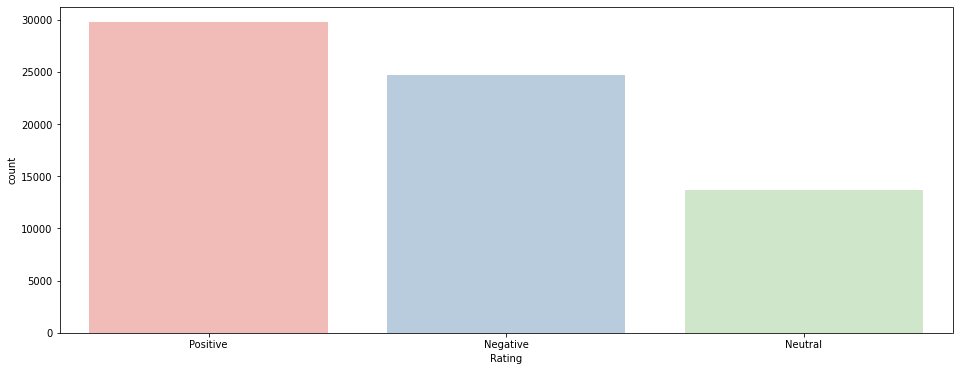

The percentage of the value Positive is of 43.66 % 

The percentage of the value Neutral is of 36.26 % 

The percentage of the value Negative is of 20.080000000000002 % 



In [53]:
print("Basic Info of the Rating feedback...")
a = data_augmented["Rating"].value_counts()
print(a,"\n")
plt.figure(figsize=(16,6))
sns.countplot(data=data_augmented, x="Rating", palette='Pastel1')
plt.show()

total = data_augmented.shape[0]
classes = ["Positive", "Neutral", "Negative"]
for i in range(3):
    percentage = a[i]/total
    print(f"The percentage of the value {classes[i]} is of",round(percentage,4)*100,"%","\n")

In [54]:
data_augmented.to_csv("data_aug.csv")

# Let´s "clean" the text from the Review column...

In [55]:
import text_normalizer

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


In [56]:
for index,column in data_augmented.iterrows():
  data_augmented.loc[index,"Review"] = text_normalizer.clean_text(
    text=data_augmented.loc[index,"Review"],
    puncts=True,
    stopwords=True,
    urls=True,
    emails=True,
    numbers=True,
    emojis=True,
    special_char=True,
    phone_num=True,
    non_ascii=True,
    multiple_whitespaces=True,
    contractions=True,
    currency_symbols=True,
    custom_pattern=None,
  )
  data_augmented.loc[index,"Review"] = text_normalizer.lemmatize_text(data_augmented.loc[index,"Review"])

In [57]:
data_augmented

,Review,Rating
0,great music service audio high quality app eas...,Positive
1,ignore previous negative rating app super grea...,Positive
2,popup well spotify experience android annoying...,Positive
3,buggy terrible use recently,Negative
4,dear spotify song do not playlist shuffle play,Negative
...,...,...
68219,spotify great listen app close unlike youtube ...,Neutral
68220,you re pay user ok artist small percentage pay...,Neutral
68221,spotify premium big disappointment app behave ...,Neutral
68222,application good unavailable song phone laptop...,Neutral


In [61]:
data_augmented.to_csv("clean_data_aug.csv")

# Quick Analysis of the text/words on the column "Review"

In [58]:
from wordcloud import WordCloud

In [59]:
# Generating the respective texts for each particular sentiment analysis
positive_text = []
negative_text = []
neutral_text  = []
for index, columns in data.iterrows():
    if data.loc[index,"Rating"] == "Positive":
        positive_text.append(data.loc[index,"Review"])
    elif data.loc[index,"Rating"] == "Neutral":
        neutral_text.append(data.loc[index,"Review"])
    else:
        negative_text.append(data.loc[index,"Review"])

positive_text = str(positive_text)
negative_text = str(negative_text)
neutral_text  = str(neutral_text)

POSOTIVE REVIEWS


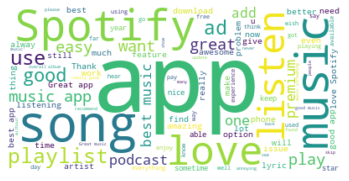

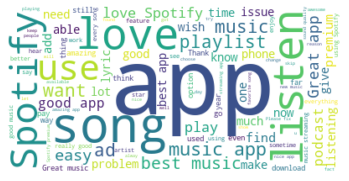

NEGATIVE REVIEWS


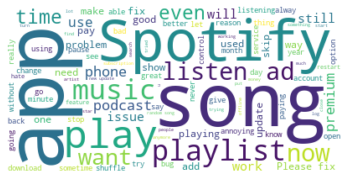

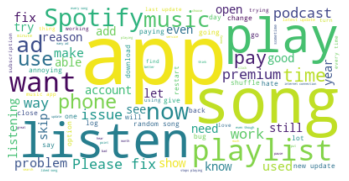

NEUTRAL REVIEWS


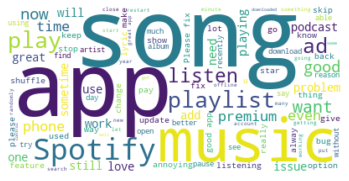

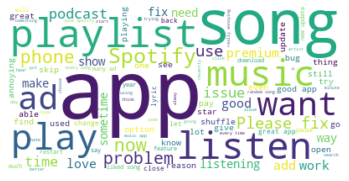

In [60]:
def show_wordcloud(text, sent):
    print(sent)
    #WordClod of just 1 word
    wordcloud = WordCloud( max_words=100, background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

    #WordCloud of two words
    wordcloud_2 = WordCloud(collocation_threshold = 2, collocations= True, max_words=100, background_color="white").generate(text)
    plt.imshow(wordcloud_2, interpolation='bilinear')
    plt.axis("off")
    plt.show()

sents = ["POSOTIVE REVIEWS", "NEGATIVE REVIEWS", "NEUTRAL REVIEWS"]
texts = [positive_text, negative_text, neutral_text]
for i in range(len(texts)):
    show_wordcloud(texts[i], sents[i])

In [4]:
data = pd.read_csv("/Users/carolinapeinado/Desktop/Santi/SpotifyAppReviews/files/datasets/clean_data_aug.csv", index_col=0)

In [5]:
from sklearn.model_selection import train_test_split

X = data["Review"]
y = data.drop(["Review"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, shuffle=True, stratify=y, random_state=27)

---
## 3. Feature Engineering

For this step we have a variaty of options to choose. It is known by now that the best, in general terms, is using some of the Word Embedding already created from the big corporations such as Word2Vec(Google) or GloVe(Stanford). Also, I could make my own Embedding with the Gensim Library. There are several options, one more "expensive" (computationally speaking) than the other but also more effective. A good practive would be trying some of them and make a comparison...

In [55]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [66]:
#Bow/CountVectorizer
bow_vectorizer = CountVectorizer(ngram_range=(1,2), max_features=1500)
bow_train_vect = bow_vectorizer.fit_transform(X_train.values.astype('U'))
bow_test_vect  = bow_vectorizer.transform(X_test.values.astype('U'))

#Tf-Idf
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=1500)
tfidf_train_vect = tfidf_vectorizer.fit_transform(X_train.values.astype('U'))
tfidf_test_vect  = tfidf_vectorizer.transform(X_test.values.astype('U'))

In [67]:
feature_names_bow = bow_vectorizer.get_feature_names()
feature_names_tfidf = tfidf_vectorizer.get_feature_names()

#Let´s quickly see how many of these 1500 most frequents words/n-grams coincide between these two different vectorizer method, the "logical" thing would be the entire 1500 because the corpus is the same....
def intersection(lst1, lst2):
    return len(list(set(lst1) & set(lst2)))
 

print(intersection(feature_names_bow, feature_names_tfidf))

1500


# Understanding the Sparse Matrix formed and showing the difference between the selected Vectorizers

In [ ]:
from IPython.display import display, HTML

Both Matrixes have 47718 rows with 1500 columns, one per word/n-gram. The only difference is that the BoW Matrix values in it are integres (because it counts how many times the word/n-gram appears on the document) and on the Tf-Idf Matrix they are floats as it is a calculation on how important is the that word/n-gram in the corpus in comparison to others.

In [68]:
bow_train_vect

<47718x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 698464 stored elements in Compressed Sparse Row format>

In [69]:
tfidf_train_vect

<47718x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 698464 stored elements in Compressed Sparse Row format>

In [ ]:
X_train.head(2)

43471    can not disable music play automatically conne...
26101    rid automatically add song let play playlist o...
Name: Review, dtype: object

In [ ]:
df_bow= pd.DataFrame(bow_train_vect.toarray(),columns=feature_names_bow)
display(HTML(df_bow.head(2).to_html()))

,ability,able,able listen,able play,absolute,absolutely,absolutely love,access,accidentally,account,act,actual,actually,ad,ad ad,ad annoy,ad app,ad can,ad come,ad do,ad free,ad like,ad listen,ad min,ad minute,ad music,ad play,ad premium,ad row,ad song,ad time,add,add feature,add music,add playlist,add random,add song,address,advert,advertisement,advertising,afford,age,ago,album,alexa,algorithm,all,allow,alot,alternative,amazing,amazing app,amazing music,amazon,amazon music,android,android auto,annoy,annoying,annoying ad,anymore,anytime,apart,app,app ad,app add,app amazing,app app,app bad,app be,app break,app buggy,app can,app close,app constantly,app crash,app do,app download,app easy,app enjoy,app far,app find,app fix,app free,app get,app give,app go,app good,app great,app issue,app keep,app like,app listen,app long,app lot,app love,app music,app need,app nice,app open,app pay,app phone,app play,app premium,app problem,app randomly,app recently,app recommend,app restart,app show,app song,app spotify,app star,app start,app stop,app suck,app thank,app thing,app time,app try,app update,app use,app ve,app want,app well,app will,app wish,app work,app year,apparently,appear,apple,apple music,application,appreciate,area,artist,artist song,asap,ask,atleast,audio,audio quality,auto,automatically,autoplay,available,away,awesome,awesome app,awful,background,bad,bad app,bad experience,bad music,band,bar,bar disappear,barely,base,basic,basically,battery,bc,be,be not,beautiful,begin,believe,big,bit,black,block,bluetooth,bluetooth device,bother,break,break app,brilliant,bring,bts,bug,bug fix,buggy,build,bunch,business,button,buy,buy premium,cache,call,can,can not,cancel,cancel premium,cancel subscription,car,card,care,case,cast,cause,cd,certain,certain song,change,change song,charge,cheap,check,choice,choice music,choose,choose song,clean,clear,clear cache,clearly,click,click play,click song,close,close app,closing,collection,come,comment,commercial,company,compare,complain,complaint,complete,completely,completely different,computer,connect,connect bluetooth,connect internet,connection,consider,consistently,constant,constantly,constantly crash,contact,contain,content,continue,continue play,continuously,control,control bar,control disappear,control music,convenient,cool,correct,correctly,cost,could,could not,country,couple,cover,covid,crash,crash time,crazy,create,create playlist,creator,credit,current,current song,currently,currently play,customer,customer service,cut,cuz,daily,daily mix,damn,data,date,datum,day,day ago,deal,decent,decide,default,definitely,delete,delete app,delete download,deserve,design,desktop,despite,developer,device,different,different song,difficult,disable,disappear,disappoint,disappointed,disappointing,disconnect,discover,discover new,dislike,display,do,do not,dollar,download,download app,download music,download playlist,download podcast,download song,download spotify,drive,drop,dumb,duo,early,easily,easy,easy find,easy navigate,easy use,edit,email,enable,end,english,enhance,enjoy,enjoy app,enjoy listen,enjoy music,enjoy spotify,enjoyable,entire,entirely,episode,error,especially,etc,everyday,everytime,exact,exactly,example,excellent,excellent app,exist,exit,expect,expensive,experience,experience app,experience spotify,extra,extremely,face,facebook,fact,fail,fall,family,family plan,fan,fantastic,far,far good,fast,fast forward,fav,fav song,favorite,favorite app,favorite artist,favorite music,favorite song,favourite,favourite music,favourite song,feature,feature like,feel,feel like,figure,file,filter,finally,find,find music,find new,find song,fine,finish,fix,fix app,fix asap,fix bug,fix issue,fix problem,fix soon,follow,force,force close,force stop,forever,forget,forward,free,free music,free speech,free trial,free user,free version,freedom,freeze,frequent,frequently,friend,friendly,frustrating,fully,fun,function,functionality,future,galaxy,game,garbage,general,genre,get,get ad,get annoying,get bad,get premium,get to,ge

It can be seen that that the values from the tuple of the Matrix represent, the first one the row(the Document) and the second the column(the word/n-gram). Then, the last and unique value the amount of times that that word appears on that Doc. It can be checked manually on the Dataframe display above... Let´s move forward onto the Tf-Idf Matrix

In [ ]:
df_tfidf = pd.DataFrame(tfidf_train_vect.toarray(),columns=feature_names_tfidf)
display(HTML(df_tfidf.head(2).to_html()))

,ability,able,able listen,able play,absolute,absolutely,absolutely love,access,accidentally,account,act,actual,actually,ad,ad ad,ad annoy,ad app,ad can,ad come,ad do,ad free,ad like,ad listen,ad min,ad minute,ad music,ad play,ad premium,ad row,ad song,ad time,add,add feature,add music,add playlist,add random,add song,address,advert,advertisement,advertising,afford,age,ago,album,alexa,algorithm,all,allow,alot,alternative,amazing,amazing app,amazing music,amazon,amazon music,android,android auto,annoy,annoying,annoying ad,anymore,anytime,apart,app,app ad,app add,app amazing,app app,app bad,app be,app break,app buggy,app can,app close,app constantly,app crash,app do,app download,app easy,app enjoy,app far,app find,app fix,app free,app get,app give,app go,app good,app great,app issue,app keep,app like,app listen,app long,app lot,app love,app music,app need,app nice,app open,app pay,app phone,app play,app premium,app problem,app randomly,app recently,app recommend,app restart,app show,app song,app spotify,app star,app start,app stop,app suck,app thank,app thing,app time,app try,app update,app use,app ve,app want,app well,app will,app wish,app work,app year,apparently,appear,apple,apple music,application,appreciate,area,artist,artist song,asap,ask,atleast,audio,audio quality,auto,automatically,autoplay,available,away,awesome,awesome app,awful,background,bad,bad app,bad experience,bad music,band,bar,bar disappear,barely,base,basic,basically,battery,bc,be,be not,beautiful,begin,believe,big,bit,black,block,bluetooth,bluetooth device,bother,break,break app,brilliant,bring,bts,bug,bug fix,buggy,build,bunch,business,button,buy,buy premium,cache,call,can,can not,cancel,cancel premium,cancel subscription,car,card,care,case,cast,cause,cd,certain,certain song,change,change song,charge,cheap,check,choice,choice music,choose,choose song,clean,clear,clear cache,clearly,click,click play,click song,close,close app,closing,collection,come,comment,commercial,company,compare,complain,complaint,complete,completely,completely different,computer,connect,connect bluetooth,connect internet,connection,consider,consistently,constant,constantly,constantly crash,contact,contain,content,continue,continue play,continuously,control,control bar,control disappear,control music,convenient,cool,correct,correctly,cost,could,could not,country,couple,cover,covid,crash,crash time,crazy,create,create playlist,creator,credit,current,current song,currently,currently play,customer,customer service,cut,cuz,daily,daily mix,damn,data,date,datum,day,day ago,deal,decent,decide,default,definitely,delete,delete app,delete download,deserve,design,desktop,despite,developer,device,different,different song,difficult,disable,disappear,disappoint,disappointed,disappointing,disconnect,discover,discover new,dislike,display,do,do not,dollar,download,download app,download music,download playlist,download podcast,download song,download spotify,drive,drop,dumb,duo,early,easily,easy,easy find,easy navigate,easy use,edit,email,enable,end,english,enhance,enjoy,enjoy app,enjoy listen,enjoy music,enjoy spotify,enjoyable,entire,entirely,episode,error,especially,etc,everyday,everytime,exact,exactly,example,excellent,excellent app,exist,exit,expect,expensive,experience,experience app,experience spotify,extra,extremely,face,facebook,fact,fail,fall,family,family plan,fan,fantastic,far,far good,fast,fast forward,fav,fav song,favorite,favorite app,favorite artist,favorite music,favorite song,favourite,favourite music,favourite song,feature,feature like,feel,feel like,figure,file,filter,finally,find,find music,find new,find song,fine,finish,fix,fix app,fix asap,fix bug,fix issue,fix problem,fix soon,follow,force,force close,force stop,forever,forget,forward,free,free music,free speech,free trial,free user,free version,freedom,freeze,frequent,frequently,friend,friendly,frustrating,fully,fun,function,functionality,future,galaxy,game,garbage,general,genre,get,get ad,get annoying,get bad,get premium,get to,ge

Basically is the same idea but as I mentioned previously the value representing the word/n-gram is the calculation of Tf-Idf. 

### Pipelines!

To gain more clarity on each Vectorization technique I have shown and explained the two most common. Then, we have more Vectorization techniques to choose from scikit learn library and a lot of hyperparameters to tune, in order to achieve the best possible model performane. Also, we can not forget that not only we should make experiments about the vectorizers but also with the differents models and their respective hyperparametrs.

The best way to do this is by implementing scikit learn pipelines, so I am leaving the previous code just for didactic purposes, as those Vectorizers will not be used.

## 4. Modeling and Performance Evaluation

The Evaluation Metrics shown will be:

* `Precision`
* `Recall`
* `F1-Score`
* `Classification Report`
* `Confusion Matrix`
* `Obtain the Average ROC-AUC value`

This will be complete on the `evaluation.py` script.

In [72]:
from sklearn.pipeline import Pipeline
from sklearn import linear_model, tree
from sklearn.model_selection import cross_validate, learning_curve
import evaluation, visualization
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

Necessary pre-steps

In [16]:
#Data type transformations
y_train = y_train.to_numpy()
y_train = np.ravel(y_train)
X_train = X_train.to_numpy()

#Df creation
scores = pd.DataFrame(columns=["error_cv", "error_tr", "fit_score_time", "model"])

#Function to add scores to df
def add_results(old, error_cv, error_tr, fit_score_time, model):
    tmp = {'error_cv': [error_cv], "error_tr" : [error_tr], 'fit_score_time' : [fit_score_time], "model" : [str(model)]}
    df_tmp = pd.DataFrame(tmp)
    old = pd.concat([old, df_tmp], ignore_index=True)
    return old

### Logistic Regression

In [56]:
#Pipe creation
pipe = Pipeline([
    ("vect", CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ("model", linear_model.LogisticRegression(max_iter=100000, multi_class="ovr")),
    ])

Cross Validation without GridSearch

In [85]:
import importlib
importlib.reload(evaluation)

<module 'evaluation' from '/Users/carolinapeinado/Desktop/Santi/SpotifyAppReviews/evaluation.py'>

In [17]:
error_cv, error_tr, fit_score_time = evaluation.cv_calculus(pipe, X_train, y_train, scoring="neg_log_loss", cv=3)
scores = add_results(scores, error_cv, error_tr, fit_score_time,"LogisticRegression")

Training Log Loss Error 0.52, CV Log Loss Error 0.71
Train/Validation: 1.4


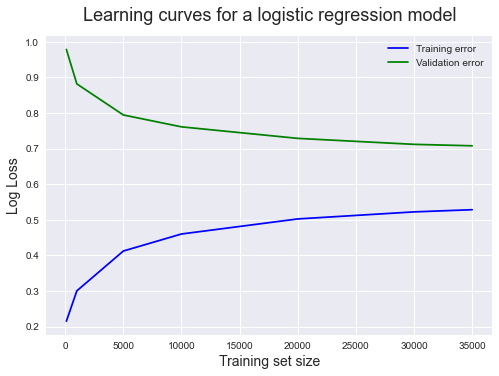

In [125]:
train_sizes, train_scores, validation_scores = learning_curve(pipe, X_train, y_train, cv=5, scoring="neg_log_loss", n_jobs=-1, train_sizes=[100,1000,5000,10000,20000,30000, 35000], shuffle=True, random_state=1)
visualization.plot_learning_curve(train_sizes, train_scores, validation_scores, "Log Loss", "Training set size", "Learning curves for a logistic regression model")

With respect of the Bias and Variance diagnose, we are dealing with a high variance and low bias issue, in other words our model is a little bit overfitted. Then, we mentioned on the EDA that we were going to deal the imbalanced problem of classes later. A quick way of doing this is to indicate on the "class_weight" hyperparameter as "balanced". Let´s see the results

In [18]:
param_grid = {
    "vect": [CountVectorizer(), TfidfVectorizer()],
    "model__class_weight": ["balanced"],
}

grid = evaluation.grid_search(pipe, parameters=param_grid, cv=3, scoring="neg_log_loss", X_train=X_train, y_train=y_train)

The time it takes to fit the model is 40 seconds.
Best params: {'model__class_weight': 'balanced', 'vect': TfidfVectorizer()}


In [19]:
error_cv, error_tr, fit_score_time = evaluation.get_errors(grid.cv_results_)
scores = add_results(scores, error_cv, error_tr, fit_score_time,"LogisticRegressionBalanced")

Training Log Loss 0.66, CV Log Loss 0.72
Train/Validation: 1.1


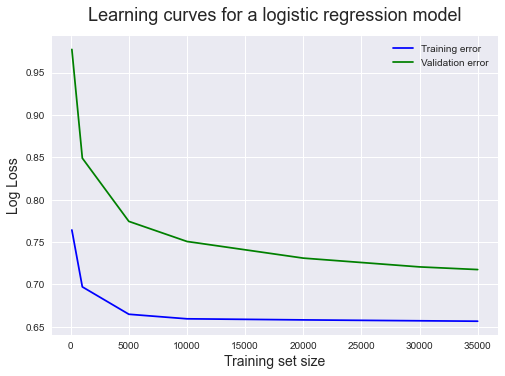

In [13]:
train_sizes, train_scores, validation_scores = learning_curve(grid.best_estimator_, X_train, y_train, cv=5, scoring="neg_log_loss", n_jobs=-1, train_sizes=[100,1000,5000,10000,20000,30000, 35000], shuffle=True, random_state=1)
visualization.plot_learning_curve(train_sizes, train_scores, validation_scores, "Log Loss", "Training set size", "Learning curves for a logistic regression model")

Even though performance is worse, the reality of it is more real and accurate. It is totally necessary to balance classes weights to give them all the same "importance".

In [57]:
param_grid = {
    "vect": [CountVectorizer(), TfidfVectorizer()],
    "vect__ngram_range" : [(1,1), (1,2)],
    "vect__max_features" : [1000, 2000],
    "model__class_weight": ["balanced"],
    "model__penalty": ["l2",'None'],
    "model__C" : [0.50, 1.0, 1.50,2.0, 2,50],
}

grid = evaluation.grid_search(pipe, parameters=param_grid, cv=3, scoring="neg_log_loss", X_train=X_train, y_train=y_train)

The time it takes to fit the model is 631 seconds.
Best params: {'model__C': 2.0, 'model__class_weight': 'balanced', 'model__penalty': 'l2', 'vect': CountVectorizer(max_features=2000, ngram_range=(1, 2)), 'vect__max_features': 2000, 'vect__ngram_range': (1, 2)}


In [78]:
error_cv, error_tr, fit_score_time = evaluation.get_errors(grid.cv_results_)
scores = add_results(scores, error_cv, error_tr, fit_score_time,"LogisticRegressionBalancedGS")

Training Log Loss 0.65, CV Log Loss 0.71
Train/Validation: 1.1


There is practicallay not any significant difference from the previously trained Logistic Regression without regularizers

### Decision Tree Classifier

Tree models tend to overfit if no regularization techniques are added to them. Let´s see if it performs naturally and how to improve it

In [25]:
#Pipe creation
pipe = Pipeline([
    ("vect", CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ("model", tree.DecisionTreeClassifier()),
    ])

In [26]:
error_cv, error_tr, fit_score_time = evaluation.cv_calculus(pipe, X_train, y_train, scoring="neg_log_loss", cv=3)
scores = add_results(scores, error_cv, error_tr, fit_score_time,"DecTreeClassifier")

Training Log Loss Error 0.00, CV Log Loss Error 12.79
Train/Validation: 3302.7


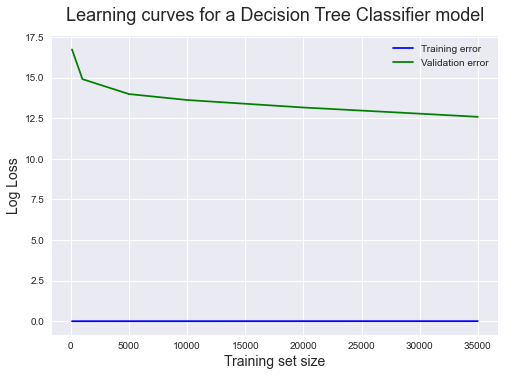

In [28]:
train_sizes, train_scores, validation_scores = learning_curve(pipe, X_train, y_train, cv=5, scoring="neg_log_loss", n_jobs=-1, train_sizes=[100,1000,5000,10000,20000,30000, 35000], shuffle=True, random_state=1)
visualization.plot_learning_curve(train_sizes, train_scores, validation_scores, "Log Loss", "Training set size", "Learning curves for a Decision Tree Classifier model")

Our assumption was correct, let´s balanced the class´s weights of our tree to get more "real" results. We should expect a similar performance as the last non-regularized tree, even a little bit worse, as we have seen on the Logistic Regression example

In [33]:
param_grid = {
    "vect": [CountVectorizer(), TfidfVectorizer()],
    "model__class_weight": ["balanced"],
}

grid = evaluation.grid_search(pipe, parameters=param_grid, cv=3, scoring="neg_log_loss", X_train=X_train, y_train=y_train)

The time it takes to fit the model is 71 seconds.
Best params: {'model__class_weight': 'balanced', 'vect': CountVectorizer()}


In [34]:
error_cv, error_tr, fit_score_time = evaluation.get_errors(grid.cv_results_)
scores = add_results(scores, error_cv, error_tr, fit_score_time,"DecTreeClassifierBalanced")

Training Log Loss 0.00, CV Log Loss 12.86
Train/Validation: 3133.9


Having demostrated this, let´s try to search for the best hyperparameters possible with the addition of regularizers

In [36]:
param_grid = {
    "vect": [TfidfVectorizer()],
    "vect__ngram_range" : [(1,1), (1,2)],
    "vect__max_features" : [1000, 2000],
    "model__class_weight": ["balanced"],
    'model__max_features':(1,2,'sqrt', 'log2'),
    'model__max_depth' : [1,2,3],
    'model__min_samples_leaf':[1,2,3], 
}

grid = evaluation.grid_search(pipe, parameters=param_grid, cv=3, scoring="neg_log_loss", X_train=X_train, y_train=y_train)

The time it takes to fit the model is 909 seconds.
Best params: {'model__class_weight': 'balanced', 'model__max_depth': 3, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 3, 'vect': TfidfVectorizer(max_features=1000, ngram_range=(1, 2)), 'vect__max_features': 1000, 'vect__ngram_range': (1, 2)}


In [38]:
error_cv, error_tr, fit_score_time = evaluation.get_errors(grid.cv_results_)
scores = add_results(scores, error_cv, error_tr, fit_score_time,"DecTreeClassifierBalancedGS")

Training Log Loss 1.04, CV Log Loss 1.05
Train/Validation: 1.0


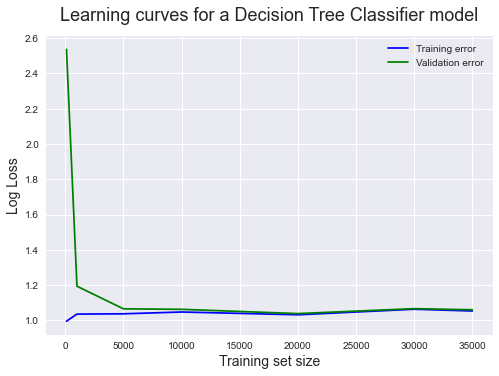

In [40]:
train_sizes, train_scores, validation_scores = learning_curve(grid.best_estimator_, X_train, y_train, cv=5, scoring="neg_log_loss", n_jobs=-1, train_sizes=[100,1000,5000,10000,20000,30000, 35000], shuffle=True, random_state=1)
visualization.plot_learning_curve(train_sizes, train_scores, validation_scores, "Log Loss", "Training set size", "Learning curves for a Decision Tree Classifier model")

In [42]:
param_grid = {
    "vect": [TfidfVectorizer()],
    "vect__ngram_range" : [(1,2)],
    "vect__max_features" : [1000],
    "model__class_weight": ["balanced"],
    'model__max_features':(3,4,5,6,'sqrt','log2'),
    'model__max_depth' : [3,4,5,6],
    'model__min_samples_leaf':[3,4,5,6], 
}

grid = evaluation.grid_search(pipe, parameters=param_grid, cv=3, scoring="neg_log_loss", X_train=X_train, y_train=y_train)

The time it takes to fit the model is 851 seconds.
Best params: {'model__class_weight': 'balanced', 'model__max_depth': 5, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 3, 'vect': TfidfVectorizer(max_features=1000, ngram_range=(1, 2)), 'vect__max_features': 1000, 'vect__ngram_range': (1, 2)}


In [43]:
error_cv, error_tr, fit_score_time = evaluation.get_errors(grid.cv_results_)
scores = add_results(scores, error_cv, error_tr, fit_score_time,"DecTreeClassifierBalancedGS1")

Training Log Loss 1.02, CV Log Loss 1.03
Train/Validation: 1.0


To conclude, the best model was the Logistic Regression with the hyperparameters selected on the GridSearch. Let´s evaluate it with our chosen evaluation metrics, the Overall Roc-Auc and all of the ones inside the Confussion Matrix. Before that, we should take a quick check on our different objects created, such as the Pipeline, the Grid and the best estimator selected. I am doing this mostly to be sure of what I am "sending" to the Evaluation metrics is correct....

In [64]:
pipe

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model',
                 LogisticRegression(max_iter=100000, multi_class='ovr'))])

In [79]:
grid

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('model',
                                        LogisticRegression(max_iter=100000,
                                                           multi_class='ovr'))]),
             param_grid={'model__C': [0.5, 1.0, 1.5, 2.0, 2, 50],
                         'model__class_weight': ['balanced'],
                         'model__penalty': ['l2', 'None'],
                         'vect': [CountVectorizer(max_features=2000,
                                                  ngram_range=(1, 2)),
                                  TfidfVectorizer()],
                         'vect__max_features': [1000, 2000],
                         'vect__ngram_range': [(1, 1), (1, 2)]},
             return_train_score=True, scoring='neg_log_loss')

In [80]:
grid.best_estimator_

Pipeline(steps=[('vect',
                 CountVectorizer(max_features=2000, ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('model',
                 LogisticRegression(C=2.0, class_weight='balanced',
                                    max_iter=100000, multi_class='ovr'))])

Effectively, this are the hyperparameters of our best estimator test during the GridSearch

In [81]:
p = grid.best_estimator_.predict(X_test.values.astype("U"))
print(metrics.classification_report(y_test, p))

              precision    recall  f1-score   support

    Negative       0.73      0.72      0.73      7415
     Neutral       0.44      0.49      0.46      4107
    Positive       0.85      0.81      0.83      8929

    accuracy                           0.71     20451
   macro avg       0.67      0.67      0.67     20451
weighted avg       0.72      0.71      0.72     20451



Negative ROC AUC OvR: 0.8849
Neutral ROC AUC OvR: 0.7605
Positive ROC AUC OvR: 0.9220
Average ROC AUC OvR: 0.8558


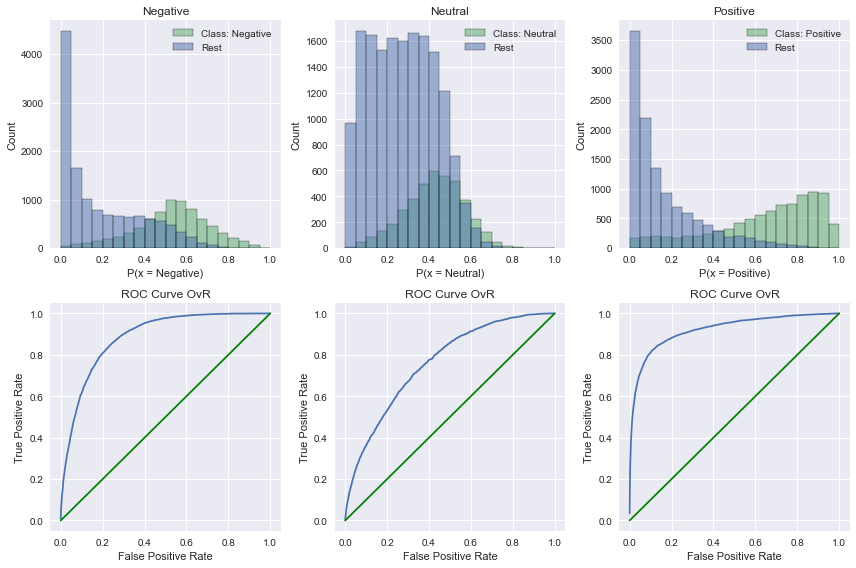

In [86]:
evaluation.plot_roc_auc_score_multiclass_ovr(grid.best_estimator_, X_test.values.astype("U"), y_test)

The model is having its most difficulties on 

# EXTRA POINT

## Training my own Word Embedding

I am going to train my own word embedding, for this we are going to use the __gensim__ library, and the $vector\_size=100$.

[Here](https://radimrehurek.com/gensim/models/word2vec.html) you can read Gensim's Word2Vec documentation so you can train your own embedding, using the review data as a corpus.

As a previous step to training my word embedding I´ve had to tokenize the corpus (this may take a bit depending on the size of the dataset and the tokenizer we use).

In [72]:
from gensim.models import Word2Vec
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()

In [73]:
def tokenize_data(corpus):
    all_token = []
    for doc in corpus:
        words = tokenizer.tokenize(doc)
        all_token.append(words)
            
    return all_token

In [74]:
X_train_w2v = X_train.copy()
X_test_w2v  = X_test.copy()
a = tokenize_data(X_train_w2v)
b = tokenize_data(X_test_w2v)

In [75]:
#Each Review is tokenized, so the Length of "a" should be the same as X_train and "b" X_test
print("The length of a is",len(a),"and the first Review Tokenized:", a[0])
print("The length of b is",len(b),"and the first Review Tokenized:", b[0])

The length of a is 47718 and the first Review Tokenized: ['usually', 'use', 'spotify', 'playlist', 'want', 'exact', 'order', 'shuffle', 'pay', 'unshuffle', 'playlist', 'fix', 'problem', 'spotify']
The length of b is 20451 and the first Review Tokenized: ['app', 'do', 'not', 'operate', 'correctly', 'alot', 'time']


In [76]:
model_w2v = Word2Vec(vector_size=100, min_count=1)
model_w2v.build_vocab(a, update=False)
model_w2v.train(a, total_examples=model_w2v.corpus_count, epochs=1)

(519280, 714812)

## Let´s evaluate the model performance checking some similarities and Visualizations

In [77]:
example = model_w2v.wv['good']
print(len(example), type(example), type(example[0]))
print(example)

100 <class 'numpy.ndarray'> <class 'numpy.float32'>
[ 0.17317548  1.1373554   0.30174845  0.1466282   1.0131342  -1.2647263
  0.49925667  1.5638692  -0.6556642  -0.5775234  -0.04230073 -1.5062492
  0.20645069  0.07372354  0.21204737 -0.19541886  0.28698167 -0.16297239
 -0.48541346 -1.2185246   0.30891916  0.5987145   0.6780181  -0.48115787
 -0.50643474  0.22729781 -0.28736714 -0.5935743  -0.77901703  0.1088722
  0.77569664 -0.5228015   0.67479724 -0.2766329  -0.13014571  1.3834237
  0.44156694 -0.3028791  -0.19716991 -0.8589562   0.3848069  -0.28616348
 -0.3811289  -0.37473443  0.6231048  -0.44439268 -0.23880455 -0.34771267
  0.33885366 -0.07009254  0.5477666  -0.97145087 -0.1341913   0.168934
 -0.17349601  0.15462586  0.50151914 -0.34421825 -0.18036304 -0.0831079
  0.15853566  0.13951477  0.438959   -0.20108852 -0.43762466  0.8007552
 -0.3103907   0.532438   -0.99623966  0.4734182  -0.5534063   0.15774405
  1.0168049   0.03219993  0.43378562  0.07430562  0.07123456 -0.24616523
 -0.769

In [78]:
#Adjectives
sims = model_w2v.wv.most_similar('good', topn=5)
sims_0 = model_w2v.wv.most_similar('bad', topn=5)
print("Ten most similar words of good:", sims)
print("Ten most similar words of bad:", sims_0, "\n")

#Nouns
sims_1 = model_w2v.wv.most_similar('music', topn=5)
sims_2 = model_w2v.wv.most_similar('app', topn=5)
print("Ten most similar words of music:", sims_1)
print("Ten most similar words of app:", sims_2, "\n")

#Verbs
sims_3 = model_w2v.wv.most_similar('listen', topn=5)
sims_4 = model_w2v.wv.most_similar('love', topn=5)
print("Ten most similar words of music:", sims_3)
print("Ten most similar words of app:", sims_4, "\n")

Ten most similar words of good: [('amazing', 0.9950239658355713), ('great', 0.9946190118789673), ('love', 0.9943841695785522), ('enjoy', 0.9896923899650574), ('variety', 0.9891794919967651)]
Ten most similar words of bad: [('short', 0.9964856505393982), ('rap', 0.9960194826126099), ('horrible', 0.9959551692008972), ('fast', 0.9955823421478271), ('section', 0.9955806136131287)] 

Ten most similar words of music: [('favourite', 0.9860296845436096), ('genre', 0.9840507507324219), ('wish', 0.9830616116523743), ('type', 0.9821718335151672), ('fav', 0.9818969368934631)]
Ten most similar words of app: [('usually', 0.9894970059394836), ('podcast', 0.9882535934448242), ('horrible', 0.9855429530143738), ('game', 0.9853370785713196), ('function', 0.9851490259170532)] 

Ten most similar words of music: [('hear', 0.994125485420227), ('like', 0.9905965328216553), ('want', 0.9859605431556702), ('choose', 0.9822904467582703), ('add', 0.9821430444717407)]
Ten most similar words of app: [('good', 0.9943

We can observe that it is way easier for the model to find similar words for adjectives and verbs rather than nouns. I personally believe this is because those kind of words tend to have more synonymous than nouns...

## Visualization -> Dimensionality Reduction 

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot, plot

In [ ]:
def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go
    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random
    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    
    # Label randomly subsampled 25 data points
    
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

In [ ]:
def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model_w2v)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



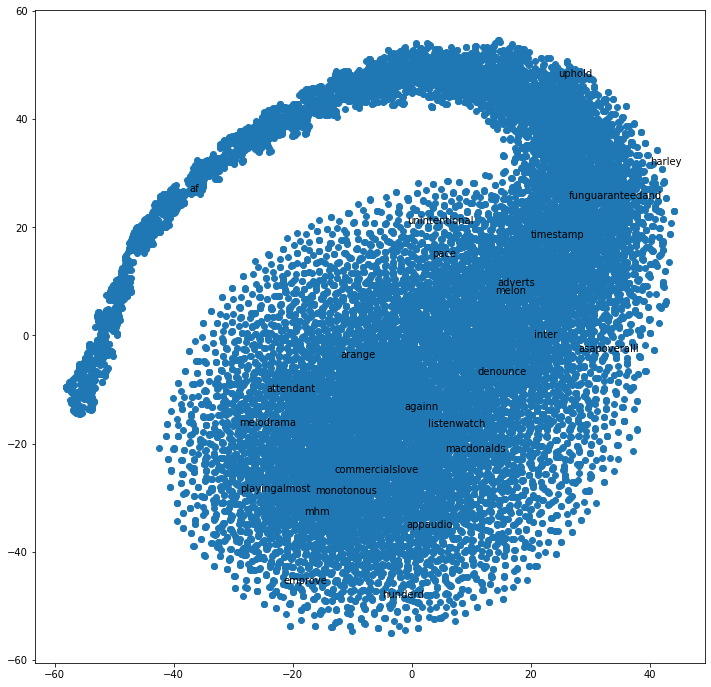

In [ ]:
plot_with_matplotlib(x_vals, y_vals, labels)

In [ ]:
plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True)

## Storing the model and continue training later

In [ ]:
model_w2v.save('word2vec.model')
#Then to loaded -> new_model = gensim.models.Word2Vec.load('/tmp/mymodel') and continue with the training -> model.train([["hello", "world"]], total_examples=1, epochs=1

## Generate averaged word vector features

Once the embedding has been trained, we must use it. Remember that embedding will convert each word you pass to it into a vector of a given dimension (in our case $vector\_size=100$). So in order to obtain a vector for each review, I must average the vectors of all the words that are part of the same review.

The function must have the following form:
* `vectorizer(corpus, model, num_features=100)`


Where:
* `corpus:` corresponds to the entire dataset, in this way we obtain an average vector for each review, with a single call to the function.
* `model:` is your trained model.
* `num_features:` the dimension of the output vector of your embedding (remember that in our case we set this value to 100).

In [79]:
def new_vectorizer(corpus, model, num_features=100):
    corpus_vectors = []
    for text in corpus:
        try:
            corpus_vectors.append(model.wv.get_mean_vector(text, pre_normalize=False))
        except:
            corpus_vectors.append(np.zeros(shape=num_features))
    return corpus_vectors

In [80]:
x_train_vectorized_avg = new_vectorizer(a, model_w2v)
x_test_vectorized_avg = new_vectorizer(b,model_w2v)

In [81]:
print(len(x_train_vectorized_avg), len(x_train_vectorized_avg[0]), type(x_train_vectorized_avg), type(x_train_vectorized_avg[0]))
print(len(x_test_vectorized_avg), len(x_test_vectorized_avg[0]) ,type(x_test_vectorized_avg) , type(x_test_vectorized_avg[0]))

47718 100 <class 'list'> <class 'numpy.ndarray'>
20451 100 <class 'list'> <class 'numpy.ndarray'>


Let's do a simple check of the embedding just trained.

In [82]:
def check_embedding(model):
    vector = model.wv['story']
    if len(vector) == 100:
        print(
            'Success! Your embedding tells me that "women" and "man" '
            f'are similar with a score of {model.wv.similarity("woman", "man")}'
        )
    else:
        raise ValueError('You should check your embedding vector size!')
        
check_embedding(model_w2v)

Success! Your embedding tells me that "women" and "man" are similar with a score of 0.9201048016548157


### Pipelines!

In order to gain more clarity on each Vectorization technique I have shown and explained the two main candidates, a part from training my own Embedding. 

With this step we finish with the first part of the Pipeline for this NLP project. Then we will be holding the Model Evaluations and selection...

## 4. Modeling and Performance Evaluation

As we said at the beginning, what interests us most in this part is pre-processing. However, we must train a model, so choose a model of your choice (obviously a classification model, given the problem we are facing). 

The Evaluation Metrics shown will be:

* `Precision`
* `Recall`
* `F1-Score`
* `Classification Report`
* `Confusion Matrix`
* `Obtain the Average ROC-AUC value`

This will be complete on the `evaluation.py` script.

To hold such a huge Model evaluation, we want to achieve some reproductibility at the time of doing it. In order to gain that, we have to leave the Jupyter Notebook for a while and build a complete script. I am going to take notes of the experiments performed and present them tidely and clearly.


Necessary tranformations and variable declarations

In [ ]:
#Df -> Array -> 1D-Array
y_train = y_train.to_numpy()
y_train = np.ravel(y_train)

#Dictionary that will hold the Average Roc-Auc value of every different vectorizer option
scores = {}

In [ ]:
#Let´s see the final average of all the different vectorization methods
print("The different Average Roc-Auc values:\n", scores, "\n")

#Searching for the best and worst model
max_key = max(scores, key=scores.get)
print("The model which performed the best is:",max_key, "\n")
for key,value in scores.items():
    if key == max_key:
        max_roc_auc = value
print(f"The score of the {max_key} was of:",max_roc_auc, "\n")

min_key = min(scores, key=scores.get)
print("The model which performed the worst is:",min_key, "\n")
for key,value in scores.items():
    if key == min_key:
        min_roc_auc = value
print(f"The score of the {min_key} was of:",min_roc_auc, "\n")

The different Average Roc-Auc values: {'lr_Bow': 0.8424462303459549, 'lr_tfidf': 0.8553351399656858, 'lr_w2v': 0.7953290842348403, 'clf_Bow': 0.8188093583654291, 'clf_tfidf': 0.8246450661260966, 'clf_w2v': 0.7876641074858278, 'gnb_Bow': 0.7858296331722886, 'gnb_tfidf': 0.793701580665679, 'gnb_w2v': 0.7703736176936354, 'svm_Bow': 0.8406054708894657, 'svm_tfidf': 0.8491762012671229, 'svm_w2v': 0.7868632282594824, 'knn_Bow': 0.7259457314845675, 'knn_tfidf': 0.6277849906842629, 'knn_w2v': 0.738784482364136}
The model which performed the best is: lr_tfidf
The score of the lr_tfidf was of: 0.8553351399656858
